Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.3715 - loss: 1.0250 - val_accuracy: 0.4026 - val_loss: 0.8126
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5317 - loss: 0.7987 - val_accuracy: 0.7145 - val_loss: 0.5679
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6834 - loss: 0.6096 - val_accuracy: 0.8744 - val_loss: 0.4350
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8058 - loss: 0.4741 - val_accuracy: 0.9477 - val_loss: 0.3550
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8689 - loss: 0.3874 - val_accuracy: 0.9767 - val_loss: 0.2962
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9109 - loss: 0.3263 - val_accuracy: 0.9836 - val_loss: 0.2442
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9353 - loss: 0.2772 - val_accuracy: 0.9868 - val_loss: 0.2035
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9554 - loss: 0.2431 - val_accuracy: 0.9899 - val_loss: 0.1703
Epoch 9/10


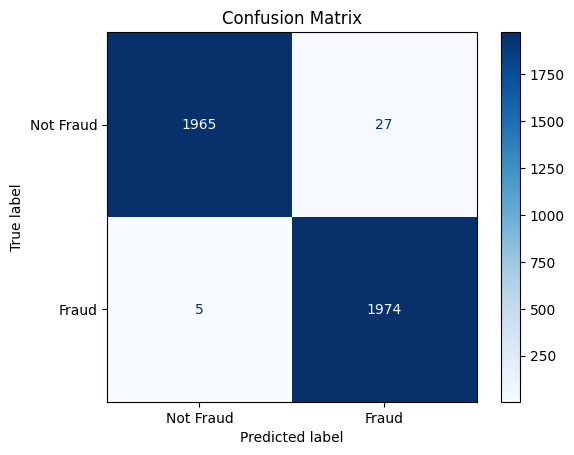

In [3]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('creditcard.csv')
df = df.dropna()  # Remove rows with any missing values
# Handle missing values by dropping rows with NaNs
df.dropna(inplace=True)

# Preprocess 'Amount' and 'Time'
scaler = RobustScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = (df['Time'] - df['Time'].min()) / (df['Time'].max() - df['Time'].min())


# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Use SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 🧠 Build Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=2048)

# 📊 Evaluation
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred, target_names=["Not Fraud", "Fraud"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()